# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [12]:
# here is a Python list:
import numpy as np

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[-3:]

# reverse the list
c = a[::-1]

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
d = [i**2 for i in a]

In [13]:
# create a numpy array from this list
b = np.array(a) # change this

In [14]:
# find the mean of b
np.mean(b)

3.5

In [15]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [16]:
# change b from a length-6 list to a 2x3 matrix
b = np.array([[1,2,3],[4,5,6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
# find the mean value of each row
row_means = b.mean(axis=1)

In [18]:
# find the mean value of each column
column_means = b.mean(axis=0)

In [19]:
# find the third column of b
third_column = b[:,2]

In [20]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv') 

In [21]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
np.mean(df['calories'])

193.87190082644628

In [22]:
# how many different categories of beverages are there?
len(pd.unique(df['beverage_category']))

9

In [78]:
# what is the average # calories for each beverage category?
df.groupby('beverage_category')[['calories']].mean()

,calories
beverage_category,
classic espresso drinks,140.172414
coffee,4.250000
frappuccino blended coffee,276.944444
frappuccino blended cr me,233.076923
frappuccino light blended coffee,162.500000
shaken iced beverages,114.444444
signature espresso drinks,250.000000
smoothies,282.222222
tazo tea drinks,177.307692


In [77]:
# what beverage preparation includes the most sugar on average?
(df.groupby('beverage_category')['sugars '].mean()).idxmax()

'frappuccino  blended coffee'

In [75]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage_category')[['calcium ']].mean()

,calcium
beverage_category,
classic espresso drinks,0.273448
coffee,0.005000
frappuccino blended coffee,0.122778
frappuccino blended cr me,0.138462
frappuccino light blended coffee,0.113333
shaken iced beverages,0.040000
signature espresso drinks,0.313750
smoothies,0.133333
tazo tea drinks,0.236538


In [81]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
maxP = df["protein "].max()
minC = (df[df["protein "] == maxProtein]['calories'].min())
df[(df["protein "] == maxP) & (df["calories"] == minC)]


,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
172,smoothies,banana chocolate smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,0.1,0.15,0.2,0.0,70


[]

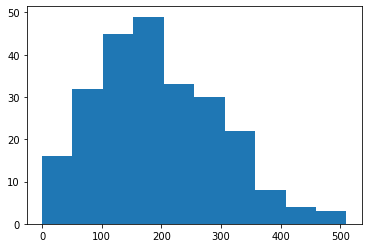

In [83]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['calories'])
plt.plot()

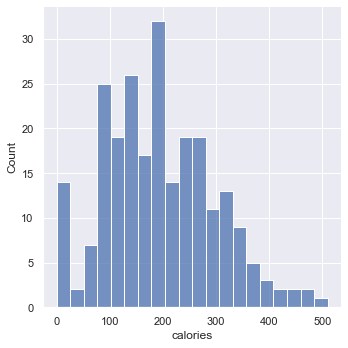

In [85]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x="calories", bins=20)

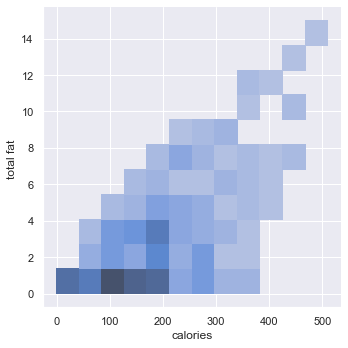

In [86]:
# plot calories against total fat using seaborn
sns.displot(data=df, x="calories", y="total fat ")

beverage_prep
2% Milk               AxesSubplot(0.125,0.125;0.775x0.755)
Doppio                AxesSubplot(0.125,0.125;0.775x0.755)
Grande                AxesSubplot(0.125,0.125;0.775x0.755)
Grande Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Short                 AxesSubplot(0.125,0.125;0.775x0.755)
Short Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Solo                  AxesSubplot(0.125,0.125;0.775x0.755)
Soymilk               AxesSubplot(0.125,0.125;0.775x0.755)
Tall                  AxesSubplot(0.125,0.125;0.775x0.755)
Tall Nonfat Milk      AxesSubplot(0.125,0.125;0.775x0.755)
Venti                 AxesSubplot(0.125,0.125;0.775x0.755)
Venti Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Whole Milk            AxesSubplot(0.125,0.125;0.775x0.755)
Name: calories, dtype: object

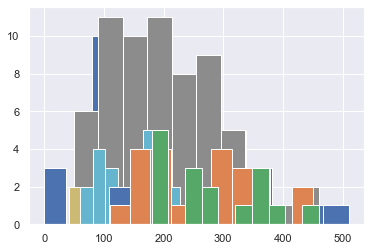

In [87]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
df.groupby("beverage_prep")["calories"].hist()